# DECISION TREE on personal loan dataset

* The data provided is from a Personal Loans Campaign executed by MyBank.
* 20000 customers were targeted with an offer of Personal Loans at 10% interest rate.
* 2512 customers out of 20000 responded expressing their need for Personal Loan; These customers are labelled as Target = 1 and remaining customers are labelled as Target =0
* Split data into Development (70%) and Hold-out (30%) Sample
* Build Classification Tree using CART technique
* Do necessary pruning
* Measure Model Performance on Development Sample
* Test Model Performance on Hold Out Sample
* Ensure the model is not an overfit model
* Identify variables that influence the reponse of a customer

#### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline


In [2]:
## Data Dictionary
plxsell_dict = pd.read_csv('PL_XSELL_METADATA.csv')
plxsell_dict

,Column Name,Description
0,CUST_ID,Customer ID - Unique ID
1,TARGET,"Target Field - 1: Responder, 0: Non-Responder"
2,AGE,Age of the customer in years
3,GENDER,Gender
4,BALANCE,Average Monthly Balance
5,OCCUPATION,Occupation
6,SCR,Generic Marketing Score
7,HOLDING_PERIOD,Ability to hold money in the account (Range 0 ...
8,ACC_TYPE,Account Type - Saving / Current
9,ACC_OP_DATE,Account Open Date


#### Loading csv file

In [3]:
#Read the csv file
df = pd.read_csv('pl_xsell2.csv')
df.columns

Index(['CUST_ID', 'TARGET', 'AGE', 'GENDER', 'BALANCE', 'OCCUPATION', 'SCR',
       'HOLDING_PERIOD', 'ACC_TYPE', 'LEN_OF_REL', 'NO_OF_L_CR_TXNS',
       'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS',
       'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS',
       'NO_OF_CHQ_DR_TXNS', 'FLG_HAS_CC', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR',
       'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR', 'AMT_L_DR',
       'FLG_HAS_ANY_CHGS', 'AMT_OTH_BK_ATM_USG_CHGS', 'AMT_MIN_BAL_NMC_CHGS',
       'NO_OF_IW_CHQ_BNC_TXNS', 'NO_OF_OW_CHQ_BNC_TXNS', 'AVG_AMT_PER_ATM_TXN',
       'AVG_AMT_PER_CSH_WDL_TXN', 'AVG_AMT_PER_CHQ_TXN', 'AVG_AMT_PER_NET_TXN',
       'AVG_AMT_PER_MOB_TXN', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN', 'random'],
      dtype='object')

#### To Check Data is Numeric or Categorical?


In [53]:
#Convert relevant columns to categorical variable
df['TARGET'] = df['TARGET'].astype('category')
df['FLG_HAS_CC'] = df['FLG_HAS_CC'].astype('category')
df['FLG_HAS_ANY_CHGS'] = df['FLG_HAS_ANY_CHGS'].astype('category')  
df['FLG_HAS_NOMINEE'] = df['FLG_HAS_NOMINEE'].astype('category')
df['FLG_HAS_OLD_LOAN'] = df['FLG_HAS_OLD_LOAN'].astype('category')


df['GENDER'] = df['GENDER'].astype('category')
df['OCCUPATION'] = df['OCCUPATION'].astype('category')
df['ACC_TYPE'] = df['ACC_TYPE'].astype('category')




#Get info about datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 37 columns):
CUST_ID                     20000 non-null object
TARGET                      20000 non-null category
AGE                         20000 non-null float64
GENDER                      20000 non-null category
BALANCE                     20000 non-null float64
OCCUPATION                  20000 non-null category
SCR                         20000 non-null int64
HOLDING_PERIOD              20000 non-null int64
ACC_TYPE                    20000 non-null category
LEN_OF_REL                  20000 non-null int64
NO_OF_L_CR_TXNS             20000 non-null int64
NO_OF_L_DR_TXNS             20000 non-null int64
TOT_NO_OF_L_TXNS            20000 non-null int64
NO_OF_BR_CSH_WDL_DR_TXNS    20000 non-null int64
NO_OF_ATM_DR_TXNS           20000 non-null int64
NO_OF_NET_DR_TXNS           20000 non-null int64
NO_OF_MOB_DR_TXNS           20000 non-null int64
NO_OF_CHQ_DR_TXNS           20000 non-nul

In [54]:
#Drop redundant columns
df = df.drop(['CUST_ID'], axis=1) 

In [55]:
#Create dataframes for X and Y variables
x = df.drop(["TARGET"], axis=1)
y = df[['TARGET']]


In [56]:
##Convert x to dummy variables
x=pd.get_dummies(x)

In [57]:
##Train test split
from sklearn.model_selection import train_test_split
seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 123)

In [58]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(14000, 44) (14000, 1)
(6000, 44) (6000, 1)


## Splitting the dataset

## Model1:- Criterion='gini'

In [59]:
model1=DecisionTreeClassifier()

In [60]:
model1.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
preds = model1.predict(X_test)

## Evaluation Metrics

In [62]:
#Confusion matrix
#Predict for train set


from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_test,preds)

print("confusion matrix = \n",mat_train)

confusion matrix = 
 [[4976  243]
 [ 161  620]]


## Model1:- Criterion='entropy'

In [63]:
model2=DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [64]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
preds2 = model2.predict(X_test)

## Evaluation Metrics

In [66]:
#Confusion matrix
#Predict for train set


from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_test,preds2)

print("confusion matrix = \n",mat_train)

confusion matrix = 
 [[4994  225]
 [ 189  592]]


In [67]:
np.round(model2.feature_importances_,3)

array([0.053, 0.084, 0.108, 0.072, 0.074, 0.051, 0.036, 0.023, 0.014,
       0.008, 0.005, 0.002, 0.016, 0.045, 0.042, 0.044, 0.019, 0.009,
       0.048, 0.   , 0.002, 0.001, 0.002, 0.017, 0.059, 0.042, 0.023,
       0.01 , 0.006, 0.004, 0.013, 0.007, 0.016, 0.003, 0.004, 0.003,
       0.003, 0.011, 0.002, 0.003, 0.   , 0.003, 0.005, 0.008])

In [68]:
print(dict(zip(df.columns, np.round(model2.feature_importances_,3))))

{'TARGET': 0.053, 'AGE': 0.084, 'GENDER': 0.108, 'BALANCE': 0.072, 'OCCUPATION': 0.074, 'SCR': 0.051, 'HOLDING_PERIOD': 0.036, 'ACC_TYPE': 0.023, 'LEN_OF_REL': 0.014, 'NO_OF_L_CR_TXNS': 0.008, 'NO_OF_L_DR_TXNS': 0.005, 'TOT_NO_OF_L_TXNS': 0.002, 'NO_OF_BR_CSH_WDL_DR_TXNS': 0.016, 'NO_OF_ATM_DR_TXNS': 0.045, 'NO_OF_NET_DR_TXNS': 0.042, 'NO_OF_MOB_DR_TXNS': 0.044, 'NO_OF_CHQ_DR_TXNS': 0.019, 'FLG_HAS_CC': 0.009, 'AMT_ATM_DR': 0.048, 'AMT_BR_CSH_WDL_DR': 0.0, 'AMT_CHQ_DR': 0.002, 'AMT_NET_DR': 0.001, 'AMT_MOB_DR': 0.002, 'AMT_L_DR': 0.017, 'FLG_HAS_ANY_CHGS': 0.059, 'AMT_OTH_BK_ATM_USG_CHGS': 0.042, 'AMT_MIN_BAL_NMC_CHGS': 0.023, 'NO_OF_IW_CHQ_BNC_TXNS': 0.01, 'NO_OF_OW_CHQ_BNC_TXNS': 0.006, 'AVG_AMT_PER_ATM_TXN': 0.004, 'AVG_AMT_PER_CSH_WDL_TXN': 0.013, 'AVG_AMT_PER_CHQ_TXN': 0.007, 'AVG_AMT_PER_NET_TXN': 0.016, 'AVG_AMT_PER_MOB_TXN': 0.003, 'FLG_HAS_NOMINEE': 0.004, 'FLG_HAS_OLD_LOAN': 0.003}


In [69]:
dict_varimp = dict(zip(x.columns, np.round(model1.feature_importances_,3)))

In [70]:
df_varimp = pd.DataFrame.from_dict(dict_varimp, orient='index')

In [71]:
df_varimp = df_varimp.sort_values(by=0, ascending=False)
df_varimp

,0
SCR,0.096
BALANCE,0.087
HOLDING_PERIOD,0.064
LEN_OF_REL,0.060
NO_OF_L_CR_TXNS,0.051
AVG_AMT_PER_CHQ_TXN,0.051
AMT_L_DR,0.051
AGE,0.045
TOT_NO_OF_L_TXNS,0.044
AVG_AMT_PER_CSH_WDL_TXN,0.043


In [72]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [73]:
feature_cols = x.columns

In [74]:
model_pruned=DecisionTreeClassifier(max_depth=3)
model_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

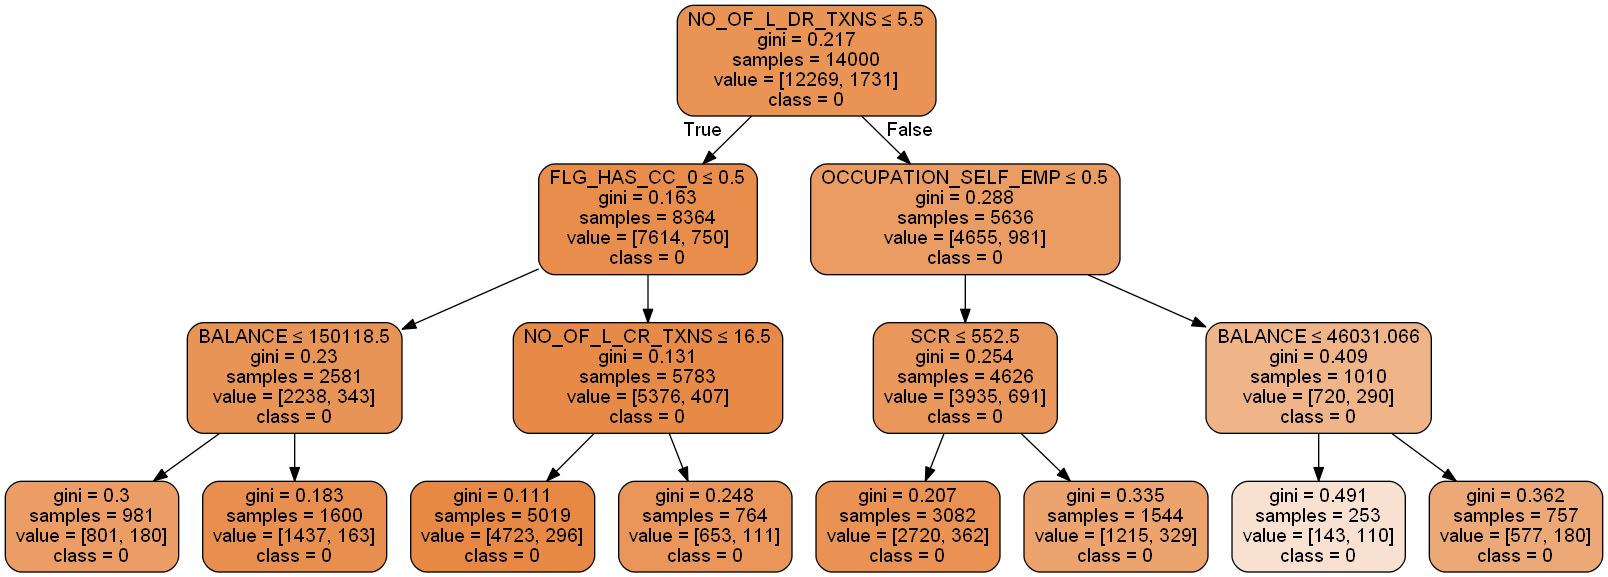

In [75]:
dot_data = StringIO()
export_graphviz(model_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wines_entropy.png')
Image(graph.create_png())

In [76]:
# store the predicted probabilities for class 1
y_pred_prob = model_pruned.predict_proba(X_test)[:, 1]
y_pred_prob[1:20]

array([0.05897589, 0.05897589, 0.1174562 , 0.1174562 , 0.101875  ,
       0.101875  , 0.05897589, 0.101875  , 0.05897589, 0.05897589,
       0.05897589, 0.05897589, 0.1174562 , 0.101875  , 0.05897589,
       0.101875  , 0.1174562 , 0.18348624, 0.05897589])

Text(0,0.5,'Frequency')

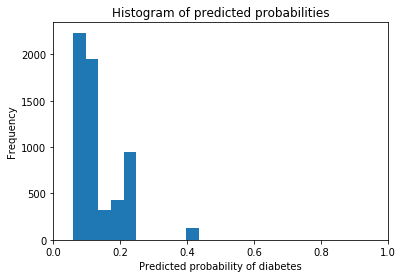

In [32]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [78]:
## Changing the cut off value for prediction
pred_proba_df = pd.DataFrame(model_pruned.predict_proba(X_test))
threshold_list = [0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.19,0.2,0.25,0.3,0.4,0.5]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {:.2f}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.13
[[   0 5219]
 [   0  781]]

******** For i = 0.06 ******
Our testing accuracy is 0.46
[[2100 3119]
 [ 134  647]]

******** For i = 0.07 ******
Our testing accuracy is 0.46
[[2100 3119]
 [ 134  647]]

******** For i = 0.08 ******
Our testing accuracy is 0.46
[[2100 3119]
 [ 134  647]]

******** For i = 0.09 ******
Our testing accuracy is 0.46
[[2100 3119]
 [ 134  647]]

******** For i = 0.1 ******
Our testing accuracy is 0.46
[[2100 3119]
 [ 134  647]]

******** For i = 0.11 ******
Our testing accuracy is 0.54
[[2649 2570]
 [ 215  566]]

******** For i = 0.12 ******
Our testing accuracy is 0.70
[[3796 1423]
 [ 384  397]]

******** For i = 0.13 ******
Our testing accuracy is 0.70
[[3796 1423]
 [ 384  397]]

******** For i = 0.14 ******
Our testing accuracy is 0.70
[[3796 1423]
 [ 384  397]]

******** For i = 0.15 ******
Our testing accuracy is 0.74
[[4070 1149]
 [ 431  350]]

******** For i = 0.19 ******
Our testing accuracy is 0

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix



In [79]:
clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 4, 5,6,7,8],
    }

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [80]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [81]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'max_depth': 8}

Confusion matrix of optimized for recall_score on the test data:
     pred_neg  pred_pos
neg      5108       111
pos       581       200


In [82]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth']].round(3)

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth
5,0.636,0.215,0.887,8
4,0.612,0.150,0.883,7
3,0.546,0.109,0.879,6
1,0.538,0.032,0.876,4
2,0.472,0.063,0.875,5
0,0.344,0.009,0.876,3


In [83]:
y_scores = grid_search_clf.predict_proba(X_test)[:, 1]


In [84]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [85]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    
   

In [86]:
precision_recall_threshold(p, r, thresholds, 0.17)

     pred_neg  pred_pos
neg      4492       727
pos       391       390


In [87]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

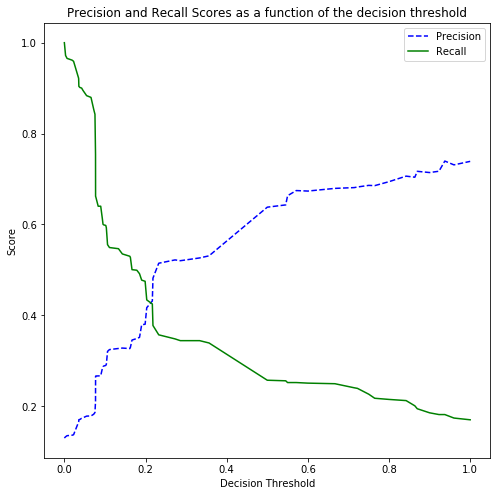

In [88]:
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)